# ML Pipeline Preparation
### 1. Importing libraries and loading data from database

In [2]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pickle
import xgboost as xgb
from xgboost import XGBClassifier

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gcfoj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gcfoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gcfoj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
# load data from database
engine = create_engine('sqlite:///DisasterResponse.db')
df = pd.read_sql_table('Message', engine)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26216 entries, 0 to 26215
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      26216 non-null  int64 
 1   message                 26216 non-null  object
 2   original                10170 non-null  object
 3   genre                   26216 non-null  object
 4   related                 26216 non-null  int64 
 5   request                 26216 non-null  int64 
 6   offer                   26216 non-null  int64 
 7   aid_related             26216 non-null  int64 
 8   medical_help            26216 non-null  int64 
 9   medical_products        26216 non-null  int64 
 10  search_and_rescue       26216 non-null  int64 
 11  security                26216 non-null  int64 
 12  military                26216 non-null  int64 
 13  child_alone             26216 non-null  int64 
 14  water                   26216 non-null  int64 
 15  fo

In [4]:
X = df['message']
Y = df.drop(columns=['id', 'message', 'original', 'genre','index'])

### 2. Writing a tokenization function to process your text data

In [5]:
def tokenize(text):
    # Normalize case
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

### 3. Building a machine learning pipeline

In [6]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenize)),
    ('clf', MultiOutputClassifier(RandomForestClassifier()))
])

### 4. Training pipeline
- Split data into train and test sets
- Train pipeline

In [7]:
# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
print(X_train.isnull().sum())

0


In [9]:
print(X_train.head())

23907    **Provisional conclusions and recommendations*...
16852    They are offering psycho-social support and fr...
22944    * How do beneficiaries (gender/economic status...
5516     Digicel, since last week, I have not received ...
23022    Other towns and villages in the state are also...
Name: message, dtype: object


In [8]:
# Train the pipeline
pipeline.fit(X_train, Y_train)

C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function tokenize at 0x00000201AEA54F40>)),
                ('clf',
                 MultiOutputClassifier(estimator=RandomForestClassifier()))])

### 5. Testing the model

In [9]:
# Make predictions
Y_pred = pipeline.predict(X_test)

# Report metrics for each category
for i, column in enumerate(Y.columns):
    print(f"Classification report for {column}:")
    print(classification_report(Y_test.iloc[:, i], Y_pred[:, i]))
    
    # Labels
    labels = list(set(Y_test.iloc[:, i].unique()))
    print(f"Labels: {labels}")
    
    # Confusion Matrix
    cm = confusion_matrix(Y_test.iloc[:, i], Y_pred[:, i])
    print(f"Confusion Matrix:\n{cm}")
    
    # Accuracy
    accuracy = accuracy_score(Y_test.iloc[:, i], Y_pred[:, i])
    print(f"Accuracy: {accuracy:.2f}")

Classification report for related:
              precision    recall  f1-score   support

           0       0.70      0.41      0.52      1266
           1       0.83      0.94      0.88      3938
           2       0.48      0.53      0.50        40

    accuracy                           0.81      5244
   macro avg       0.67      0.63      0.63      5244
weighted avg       0.80      0.81      0.79      5244

Labels: [0, 1, 2]
Confusion Matrix:
[[ 519  739    8]
 [ 218 3705   15]
 [   3   16   21]]
Accuracy: 0.81
Classification report for request:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4349
           1       0.82      0.47      0.60       895

    accuracy                           0.89      5244
   macro avg       0.86      0.73      0.77      5244
weighted avg       0.89      0.89      0.88      5244

Labels: [0, 1]
Confusion Matrix:
[[4259   90]
 [ 473  422]]
Accuracy: 0.89
Classification report for offer:
        

C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4822
           1       0.70      0.10      0.18       422

    accuracy                           0.92      5244
   macro avg       0.82      0.55      0.57      5244
weighted avg       0.91      0.92      0.90      5244

Labels: [0, 1]
Confusion Matrix:
[[4804   18]
 [ 379   43]]
Accuracy: 0.92
Classification report for medical_products:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4974
           1       0.78      0.08      0.14       270

    accuracy                           0.95      5244
   macro avg       0.87      0.54      0.56      5244
weighted avg       0.94      0.95      0.93      5244

Labels: [0, 1]
Confusion Matrix:
[[4968    6]
 [ 249   21]]
Accuracy: 0.95
Classification report for search_and_rescue:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      511

C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4766
           1       0.88      0.76      0.82       478

    accuracy                           0.97      5244
   macro avg       0.93      0.88      0.90      5244
weighted avg       0.97      0.97      0.97      5244

Labels: [0, 1]
Confusion Matrix:
[[4715   51]
 [ 113  365]]
Accuracy: 0.97
Classification report for cold:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5127
           1       0.70      0.06      0.11       117

    accuracy                           0.98      5244
   macro avg       0.84      0.53      0.55      5244
weighted avg       0.97      0.98      0.97      5244

Labels: [0, 1]
Confusion Matrix:
[[5124    3]
 [ 110    7]]
Accuracy: 0.98
Classification report for other_weather:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4968
           1  

### 6. Improving the model
Use grid search to find better parameters. 

In [10]:
# Define parameters for GridSearchCV
parameters = {
    'clf__estimator__n_estimators': [50, 100]
    # ,
    # 'clf__estimator__max_depth': [None, 10]
}

# Create GridSearchCV object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit the model
cv.fit(X_train, Y_train)

C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is no

GridSearchCV(estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(tokenizer=<function tokenize at 0x00000201AEA54F40>)),
                                       ('clf',
                                        MultiOutputClassifier(estimator=RandomForestClassifier()))]),
             param_grid={'clf__estimator__n_estimators': [50, 100]})

In [21]:
# Check the best estimator
best_estimator = cv.best_estimator_
print("Best estimator: ", best_estimator)

Best estimator:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function tokenize at 0x00000201AEA54F40>)),
                ('clf',
                 MultiOutputClassifier(estimator=RandomForestClassifier()))])


In [23]:
# Access the best estimator
best_estimator = cv.best_estimator_

# Access the RandomForestClassifier within the MultiOutputClassifier
random_forest = best_estimator.named_steps['clf'].estimator

# Print the parameters of the RandomForestClassifier
print("Best RandomForestClassifier parameters: ", random_forest.get_params())

Best RandomForestClassifier parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [24]:
# Get the value of n_estimators
n_estimators = random_forest.n_estimators
print("Selected n_estimators: ", n_estimators)

Selected n_estimators:  100


### 7. Testing the model

In [12]:
# Make predictions with the tuned model
Y_pred_tuned = cv.predict(X_test)

# Report metrics for each category
for i, column in enumerate(Y.columns):
    print(f"Tuned Classification report for {column}:")
    print(classification_report(Y_test.iloc[:, i], Y_pred_tuned[:, i]))
    
    # Labels
    labels = list(set(Y_test.iloc[:, i].unique()))
    print(f"Tuned Labels: {labels}")
    
    # Confusion Matrix
    cm = confusion_matrix(Y_test.iloc[:, i], Y_pred_tuned[:, i])
    print(f"Tuned Confusion Matrix:\n{cm}")
    
    # Accuracy
    accuracy = accuracy_score(Y_test.iloc[:, i], Y_pred_tuned[:, i])
    print(f"Tuned Accuracy: {accuracy:.2f}")

Tuned Classification report for related:
              precision    recall  f1-score   support

           0       0.70      0.42      0.52      1266
           1       0.83      0.94      0.88      3938
           2       0.38      0.50      0.43        40

    accuracy                           0.81      5244
   macro avg       0.64      0.62      0.61      5244
weighted avg       0.80      0.81      0.79      5244

Tuned Labels: [0, 1, 2]
Tuned Confusion Matrix:
[[ 529  722   15]
 [ 221 3699   18]
 [   2   18   20]]
Tuned Accuracy: 0.81
Tuned Classification report for request:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4349
           1       0.83      0.49      0.62       895

    accuracy                           0.90      5244
   macro avg       0.87      0.74      0.78      5244
weighted avg       0.89      0.90      0.89      5244

Tuned Labels: [0, 1]
Tuned Confusion Matrix:
[[4256   93]
 [ 452  443]]
Tuned Accuracy

C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5089
           1       0.56      0.06      0.11       155

    accuracy                           0.97      5244
   macro avg       0.77      0.53      0.55      5244
weighted avg       0.96      0.97      0.96      5244

Tuned Labels: [0, 1]
Tuned Confusion Matrix:
[[5082    7]
 [ 146    9]]
Tuned Accuracy: 0.97
Tuned Classification report for child_alone:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5244

    accuracy                           1.00      5244
   macro avg       1.00      1.00      1.00      5244
weighted avg       1.00      1.00      1.00      5244

Tuned Labels: [0]
Tuned Confusion Matrix:
[[5244]]
Tuned Accuracy: 1.00
Tuned Classification report for water:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4905
           1       0.87      0.36      0.5

C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Tuned Confusion Matrix:
[[5222    0]
 [  22    0]]
Tuned Accuracy: 1.00
Tuned Classification report for aid_centers:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5177
           1       0.00      0.00      0.00        67

    accuracy                           0.99      5244
   macro avg       0.49      0.50      0.50      5244
weighted avg       0.97      0.99      0.98      5244

Tuned Labels: [0, 1]
Tuned Confusion Matrix:
[[5177    0]
 [  67    0]]
Tuned Accuracy: 0.99
Tuned Classification report for other_infrastructure:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5021
           1       0.00      0.00      0.00       223

    accuracy                           0.96      5244
   macro avg       0.48      0.50      0.49      5244
weighted avg       0.92      0.96      0.94      5244

Tuned Labels: [0, 1]
Tuned Confusion Matrix:
[[5019    2]
 [ 223    0]]
Tuned Accu

### 8. Improving model further via using XGBoost

In [13]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 4.8 MB/s eta 0:00:27
    --------------------------------------- 1.8/124.9 MB 5.0 MB/s eta 0:00:25
    --------------------------------------- 2.9/124.9 MB 4.5 MB/s eta 0:00:27
   - -------------------------------------- 3.7/124.9 MB 4.4 MB/s eta 0:00:28
   - -------------------------------------- 4.5/124.9 MB 4.4 MB/s eta 0:00:28
   - -------------------------------------- 5.2/124.9 MB 4.2 MB/s eta 0:00:29
   - -------------------------------------- 5.8/124.9 MB 4.1 MB/s eta 0:00:29
   -- ------------------------------------- 6.6/124.9 MB 3.9 MB/s eta 0:00:30
   -- ------------------------------------- 7.3/124.9 MB 3.9 MB/s eta 0:00:30
   -- ------------------------------------- 8.1/124.9 MB 3.9 MB/s eta 0:00:31
   -- ------------------------------------- 8.9/124.9 MB 3.9 MB/s eta 0:00:30
   --- ------------------------------------ 9.7/124.9 MB 3.9 MB/s eta 

In [15]:
# Create a new pipeline with XGBoost
xgb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenize)),  # Use the tokenize function
    ('clf', MultiOutputClassifier(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')))
])

In [16]:
# Train the XGBoost pipeline
xgb_pipeline.fit(X_train, Y_train)

C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:06:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:07:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:07:32] WARNING: C:\buildkite-agent

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function tokenize at 0x00000201AEA54F40>)),
                ('clf',
                 MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               device=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metric='mlogloss',
                                                               feature...
                                                               grow_policy=None,
                                                               importance_type=None,
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None, ...)))])

In [17]:
# Test the model with the original data
Y_pred_xgb = xgb_pipeline.predict(X_test)

In [18]:
# Report metrics for each category using XGBoost model
for i, column in enumerate(Y.columns):
    print(f"Classification report for {column}:")
    print(classification_report(Y_test.iloc[:, i], Y_pred_xgb[:, i]))
    
    # Labels
    labels = list(set(Y_test.iloc[:, i].unique()))
    print(f"Labels: {labels}")
    
    # Confusion Matrix
    cm = confusion_matrix(Y_test.iloc[:, i], Y_pred_xgb[:, i])
    print(f"Confusion Matrix:\n{cm}")
    
    # Accuracy
    accuracy = accuracy_score(Y_test.iloc[:, i], Y_pred_xgb[:, i])
    print(f"Accuracy: {accuracy:.2f}")
    print("\n")

Classification report for related:
              precision    recall  f1-score   support

           0       0.72      0.35      0.47      1266
           1       0.81      0.95      0.88      3938
           2       0.20      0.03      0.04        40

    accuracy                           0.80      5244
   macro avg       0.58      0.44      0.46      5244
weighted avg       0.79      0.80      0.77      5244

Labels: [0, 1, 2]
Confusion Matrix:
[[ 443  822    1]
 [ 175 3760    3]
 [   0   39    1]]
Accuracy: 0.80


Classification report for request:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4349
           1       0.80      0.54      0.64       895

    accuracy                           0.90      5244
   macro avg       0.86      0.75      0.79      5244
weighted avg       0.89      0.90      0.89      5244

Labels: [0, 1]
Confusion Matrix:
[[4229  120]
 [ 414  481]]
Accuracy: 0.90


Classification report for offer:
    

C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Accuracy: 1.00


Classification report for water:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4905
           1       0.76      0.63      0.69       339

    accuracy                           0.96      5244
   macro avg       0.87      0.81      0.83      5244
weighted avg       0.96      0.96      0.96      5244

Labels: [0, 1]
Confusion Matrix:
[[4837   68]
 [ 125  214]]
Accuracy: 0.96


Classification report for food:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4649
           1       0.83      0.75      0.78       595

    accuracy                           0.95      5244
   macro avg       0.90      0.86      0.88      5244
weighted avg       0.95      0.95      0.95      5244

Labels: [0, 1]
Confusion Matrix:
[[4555   94]
 [ 150  445]]
Accuracy: 0.95


Classification report for shelter:
              precision    recall  f1-score   support

           0       0

In [ ]:
# # Define parameters for GridSearchCV with XGBoost
# xgb_parameters = {
#     'clf__estimator__n_estimators': [50, 100],
#     'clf__estimator__max_depth': [3, 5, 7],
#     'clf__estimator__learning_rate': [0.01, 0.1, 0.2]
# }

In [ ]:
# # Create GridSearchCV object for the XGBoost pipeline
# xgb_cv = GridSearchCV(xgb_pipeline, param_grid=xgb_parameters)

In [ ]:
# # Fit the model
# xgb_cv.fit(X_train, Y_train)

In [ ]:
# # Test the tuned XGBoost model
# Y_pred_xgb_tuned = xgb_cv.predict(X_test)

In [ ]:
# # Report metrics for each category using the tuned XGBoost model
# for i, column in enumerate(Y.columns):
#     print(f"Tuned Classification report for {column}:")
#     print(classification_report(Y_test.iloc[:, i], Y_pred_xgb_tuned[:, i]))
    
#     # Labels
#     labels = list(set(Y_test.iloc[:, i].unique()))
#     print(f"Tuned Labels: {labels}")
    
#     # Confusion Matrix
#     cm = confusion_matrix(Y_test.iloc[:, i], Y_pred_xgb_tuned[:, i])
#     print(f"Tuned Confusion Matrix:\n{cm}")
    
#     # Accuracy
#     accuracy = accuracy_score(Y_test.iloc[:, i], Y_pred_xgb_tuned[:, i])
#     print(f"Tuned Accuracy: {accuracy:.2f}")
#     print("\n")

### 9. Exporting model as a pickle file

In [11]:
# Export the model to a pickle file
with open('final_model.pkl', 'wb') as f:
    pickle.dump(cv.best_estimator_, f)

In [32]:
# Export xgboost to a pickle file
with open('classifier.pkl', 'wb') as file:
    pickle.dump(xgb_pipeline, file)

print("Pipeline saved to classifier.pkl")

Pipeline saved to classifier.pkl


### We have decided to compare aggregated metrics of all 3 outputs: Baseline, Tuned, XGBosst:

In [27]:
# Initialize a dictionary to store metrics for each model
metrics = {
    'Model': ['Baseline', 'Tuned', 'XGBoost'],
    'Accuracy': [],
    'Average Precision': [],
    'Average Recall': [],
    'Average F1-score': []
}

# Function to calculate average metrics from classification report
def calculate_average_metrics(Y_test, Y_pred):
    report = classification_report(Y_test, Y_pred, output_dict=True)
    avg_precision = report['macro avg']['precision']
    avg_recall = report['macro avg']['recall']
    avg_f1 = report['macro avg']['f1-score']
    accuracy = accuracy_score(Y_test, Y_pred)
    return accuracy, avg_precision, avg_recall, avg_f1

# Initialize lists to store metrics for each model
baseline_metrics =tuned_metrics = []
xgboost_metrics = []

# Calculate metrics for each target
for i, column in enumerate(Y.columns):
    # Baseline model
    baseline_metrics.append(calculate_average_metrics(Y_test.iloc[:, i], Y_pred[:, i]))

    # Tuned model
    tuned_metrics.append(calculate_average_metrics(Y_test.iloc[:, i], Y_pred_tuned[:, i]))

    # XGBoost model
    xgboost_metrics.append(calculate_average_metrics(Y_test.iloc[:, i], Y_pred_xgb[:, i]))

# Calculate average metrics for each model
def average_metrics(metrics_list):
    avg_accuracy = sum(m[0] for m in metrics_list) / len(metrics_list)
    avg_precision = sum(m[1] for m in metrics_list) / len(metrics_list)
    avg_recall = sum(m[2] for m in metrics_list) / len(metrics_list)
    avg_f1 = sum(m[3] for m in metrics_list) / len(metrics_list)
    return avg_accuracy, avg_precision, avg_recall, avg_f1

# Store the average metrics for each model
metrics['Accuracy'].append(average_metrics(baseline_metrics)[0])
metrics['Average Precision'].append(average_metrics(baseline_metrics)[1])
metrics['Average Recall'].append(average_metrics(baseline_metrics)[2])
metrics['Average F1-score'].append(average_metrics(baseline_metrics)[3])

metrics['Accuracy'].append(average_metrics(tuned_metrics)[0])
metrics['Average Precision'].append(average_metrics(tuned_metrics)[1])
metrics['Average Recall'].append(average_metrics(tuned_metrics)[2])
metrics['Average F1-score'].append(average_metrics(tuned_metrics)[3])

metrics['Accuracy'].append(average_metrics(xgboost_metrics)[0])
metrics['Average Precision'].append(average_metrics(xgboost_metrics)[1])
metrics['Average Recall'].append(average_metrics(xgboost_metrics)[2])
metrics['Average F1-score'].append(average_metrics(xgboost_metrics)[3])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)

C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gcfoj\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

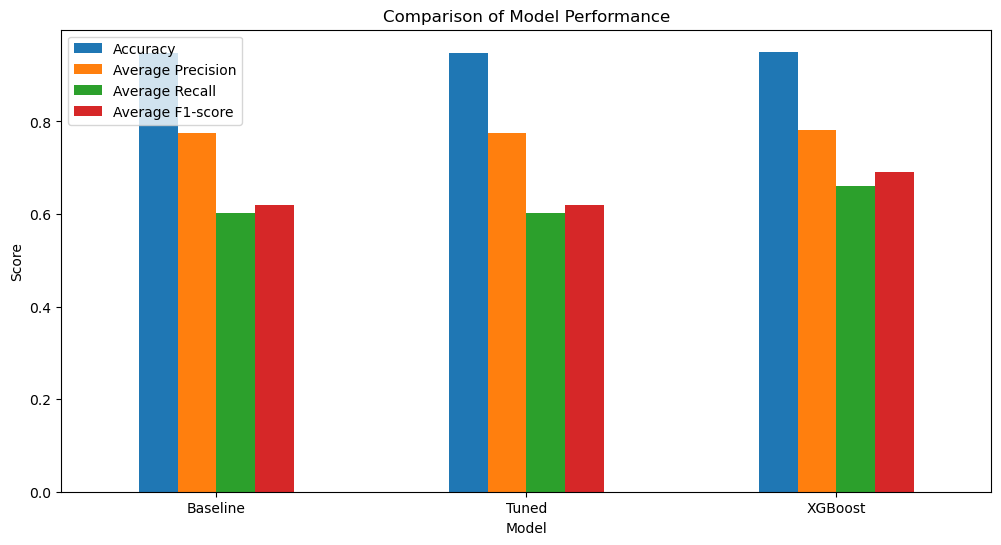

In [28]:
# Set the index to model names
metrics_df.set_index('Model', inplace=True)

# Plotting
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

In [31]:
print(metrics_df)

          Accuracy  Average Precision  Average Recall  Average F1-score
Model                                                                  
Baseline   0.94824           0.774297        0.601914          0.619684
Tuned      0.94824           0.774297        0.601914          0.619684
XGBoost    0.95061           0.781970        0.661331          0.691524


**OBSERVATION 1** Aggregated metrics seems to be better for XGBoost model, the output of which we will use further.

**OBSERVATION 2** Baseline and Tuned versions gave the same results, as the parameters happened to be the same as in the baseline model. This happened due to limited number of parameters used for tunning to increase run speed. It is possible to extend the number of parameters going forward. We made it possible to allow increased use of various parameters in the code.

### 10. Using the notebook to complete `train_classifier.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.

### 11. Checking the output in pickle file

In [33]:
# Load the first .pkl file
with open('classifier.pkl', 'rb') as f:
    data1 = pickle.load(f)

# Load the second .pkl file
with open('final_model.pkl', 'rb') as f:
    data2 = pickle.load(f)

In [34]:
# Check the type of the loaded data
print(type(data1))
print(type(data2))

# Print the contents or summary
print(data1)
print(data2)

<class 'sklearn.pipeline.Pipeline'>
<class 'sklearn.pipeline.Pipeline'>
Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function tokenize at 0x00000201AEA54F40>)),
                ('clf',
                 MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               device=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                       